In [1]:
from pipeNetwork import pipeNetwork
from containerClass import container
import numpy as np
from scipy.integrate import solve_ivp
import igraph
from calcTw import calcTw
from calcQ import calcQ
from containerClass import container
#from systemDefinitions import system,nodes,nodes1,pipeSections,pipeSections1
from systemDefinitions import system,pipeSections,pipeSections1, pipeSections3,orificeDiam3,pipeSections4,pipeSections0,orificeDiam0
from orificeForward import main_nozzle_forward, mass_critical
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root
#!pip install --user --upgrade pixiedust

In [2]:
import pixiedust

Pixiedust database opened successfully


Unable to check latest version <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>


[]
[[0, None], [1, None], [2, None], [3, None], [4, None], [5, None], [6, None], [7, None], [8, None], [9, 2.0], [10, None], [11, 9.0], [12, None], [13, 9.0], [14, None]]


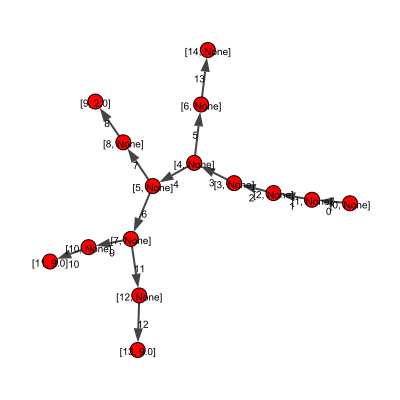

In [7]:
#%%pixie_debugger
net1 = pipeNetwork()
net1.addAllPipes(pipeSections3,orificeDiam3)
net0 = pipeNetwork()
net0.addAllPipes(pipeSections0,orificeDiam0)

net1.t.es["MFR"] = 10
net1.t.es["P0i"] = 1
net1.t.es[6]["P0i"] = 2
net1.t.vs["calculated"] = True
net1.propagateMFR(net1.t.vs[5],net1.t.es[6],net1.t.es[7])

net1.plot("MFR","index")

[]
[]


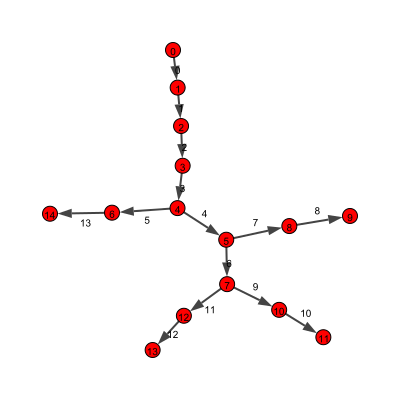

In [5]:
net1.plot("index","index")#"MFR")

In [ ]:
net1.t.vs[2].index